<a href="https://colab.research.google.com/github/mahmoud-Moru/ImageModifying/blob/main/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

input the images 



*   We used Google Colab 
*   We imported our images from Drive 
  id you want to excute teh Code add please the Folder we send you via the Link and change the Path of global variable **`path`** 






click 1 for listing the Images

click 2 for conveting the image to graysscale, viewing the orginal iamge and the modifed + saving the Image in Folders

click 3 for converting the graysimage to black white image, viewing the orginal iamge and the modifed + saving the Image in Folders

click 4 for adjusting the RGB color, viewing the orginal iamge and the modifed + saving the Image in Folders

click one of the following numbers : 4
you clicked 4
Enter a name from the listed names to select the picture:cat
Change one of these Values: "r", "g", "b": b
Please input a threshold value between 0 - 255: 200

 it takes about 30 seconds to save the Image, thank you for your patience 

 the Image shoud be saved as: /content/cat--09:08:38--img.jpg  
  
-- Use Matplotlib to display images


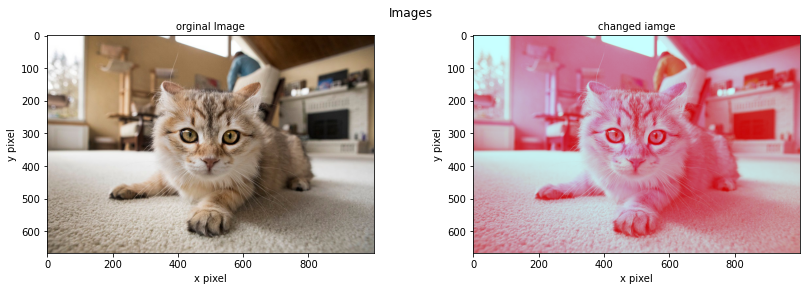

In [177]:
from google.colab import drive
drive.mount('/content/drive')

#The Whole code 
import sys
import time
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf


path = '/content/drive/MyDrive/Images/'
savedImagePath = '/content/'
img_gray = ''
img_bw = ''


def Menu():

  try:
    print('\nclick 1 for listing the Images')
    print('\nclick 2 for conveting the image to graysscale, viewing the orginal iamge and the modifed + saving the Image in Folders')
    print('\nclick 3 for converting the graysimage to black white image, viewing the orginal iamge and the modifed + saving the Image in Folders')
    print('\nclick 4 for adjusting the RGB color, viewing the orginal iamge and the modifed + saving the Image in Folders')


    input_ = int(input('\nclick one of the following numbers : '))
    if input_ == 1:
      print('\nyou clicked 1\n')
      listImages()
    elif input_ == 2:
      print('\nyou clicked 2\n')
      imageName = input("Enter a name from the listed names to select the picture:")
      Converting2Gray(imageName)
    elif input_ == 3:
      print('you clicked 3')
      imageName = input("Enter a name from the listed names to select the picture:")
      Convertong2bw(imageName)
    elif input_ == 4:
      print('you clicked 4')
      adjustRGB()
    else:
      print('\nselect only between 1-4 !')
  

  except ValueError:
    err('\nInvalid Input, The Input should be only an int ')
        


def err(msg):
    print('- Error -')
    print(msg)



#1 listing all the images 
def listImages():
  print('Here is the list of images for augmentation process: \n')

  picList = ["bicycle", "building", "caffee", "cards", "cat","dog", "flower", "fruits", "kids", "tree"]
  print('----------------------------------------------------')

  for pic in range(len(picList)):
     print (picList[pic])



#check fi the elemnt on the 
def ListOfImages(imageName):
  try:
    picList = ["bicycle", "building", "caffee", "cards", "cat","dog", "flower", "fruits", "kids", "tree"]
    if imageName not in picList:
       print("Please check your entry! It is not in the list (check also case sensitivity)")
  except ValueError:
    err('Value not Found in the List')


#2 converting to grays scale 
def Converting2Gray(imageName):
  try:
    ListOfImages(imageName)
    img_rgb = mpimg.imread(path + imageName + '.jpg')
    #
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    print("\nshape of the orginal Image ")
    print(img_rgb.shape)
    #save
    SaveImages(imageName, img_gray)
    #view
    viewPlot(img_rgb, img_gray)
  except:
    err('\nFailed Covneting image to Gray')



#3 converting to Black and white
def Convertong2bw(imageName):
  try:
    ListOfImages(imageName)
    img_rgb = mpimg.imread(path+imageName+'.jpg')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    (threshi, img_bw) = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    print("\nshape of the gray Image ")
    print(img_bw.shape)
    print('your image is converted to black and white')
    #save
    SaveImages(imageName, img_bw)
    #view
    viewPlot(img_rgb, img_bw)

  except:
    err('\nFailed Converting the Image to BW !')


#4 adjusting RGB Colour 
def adjustRGB():
    imageName = input("Enter a name from the listed names to select the picture:")

    ListOfImages(imageName)
    img_rgb = mpimg.imread(path + imageName +'.jpg')

    img_copy = cv2.imread(path + imageName +'.jpg')
    option = input('Change one of these Values: "r", "g", "b": ').lower()

    try:
      if option == 'r':
          index = 2
      elif option == 'g':
          index = 1
      elif option == 'b':
          index = 0
      else:
          print('Invalid Values !!')
          adjustRGB(imageName)
    except ValueError:
      err('Invalid Value')

    try:
      thresh = int(input('Please input a threshold value between 0 - 255: '))
      if thresh < 0 or thresh > 255:
          adjustRGB(imageName)
      #
      img_copy[:, :, index] = thresh
      tf.cast(img_copy[..., ::-1], tf.int32)
      #save
      SaveImages(imageName, img_rgb)
      #view
      viewPlot(img_rgb, img_copy)
    except :
      err('\nFailed adjusting the Image')



#saveing fucntoin
def SaveImages(imageName, savedImage):
  try:
    x = datetime.datetime.now()
    image =  '/content/' + imageName + '--'+str(x.strftime("%X")) +'--img.jpg'
    #'/content/' + imageName + '-' + savedImage + '.jpg'
    cv2.imwrite(image, savedImage)
    print('\n it takes about 30 seconds to save the Image, thank you for your patience ')
    print('\n the Image shoud be saved as: '+image+'  \n  ')
  except:
    err('\nFailed Saving Images')


#Plotting 
def viewPlot(orginalImage, modified):

    print('-- Use Matplotlib to display images')

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    plt.suptitle('Images')

    axs[0].imshow(orginalImage)
    axs[0].set_title('orginal Image', fontsize=10)
    axs[0].set_xlabel('x pixel', fontsize=10)
    axs[0].set_ylabel('y pixel', fontsize=10)  

    axs[1].imshow(modified, cmap='gray')
    axs[1].set_title('changed iamge', fontsize=10)
    axs[1].set_xlabel('x pixel', fontsize=10)
    axs[1].set_ylabel('y pixel', fontsize=10)
  


Menu()